In [1]:
import sys
import os
from pathlib import Path

# Automatically find the project root (assumes "src" is in the project)
current_file = Path(__file__).resolve() if '__file__' in locals() else Path.cwd()
project_root = current_file
while not (project_root / "src").exists() and project_root != project_root.parent:
    project_root = project_root.parent

# Ensure we found the correct project root
if not (project_root / "src").exists():
    raise FileNotFoundError("Could not find project root containing 'src' directory.")

# Set the working directory to the project root
os.chdir(project_root)
from src.compression.mps_ND import NDMPS
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from src.compression.utils_ND import *
import pickle as pkl
from copy import deepcopy

/Users/maxge/miniconda3/envs/QEL/lib/python3.10/site-packages/cotengra/hyperoptimizers/hyper.py:33: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


In [2]:
mri_file = 'Data/ds003799-2.0.0/sub-season101_ses-1_acq-MPrageHiRes_T1w.nii.gz'
img = nib.load(mri_file)
img_data = img.get_fdata()
print(type(img_data))  # it's a numpy array!
print(img_data.shape)

<class 'numpy.ndarray'>
(224, 256, 256)


(192, 192)


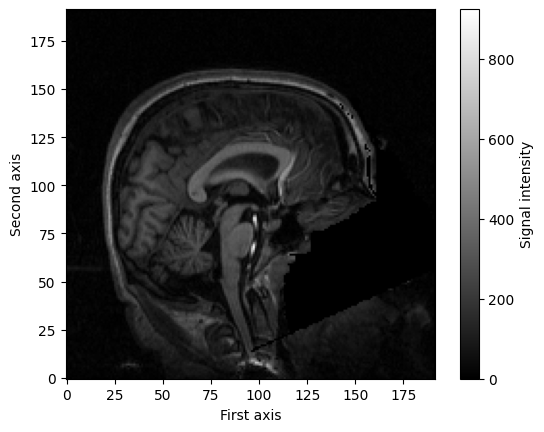

In [41]:
mid_slice_x = img_data[80, :, :]
print(mid_slice_x.shape)
# Note that the transpose the slice (using the .T attribute).
# This is because imshow plots the first dimension on the y-axis and the
# second on the x-axis, but we'd like to plot the first on the x-axis and the
# second on the y-axis. Also, the origin to "lower", as the data was saved in
# "cartesian" coordinates.
plt.imshow(mid_slice_x.T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()

In [4]:
mps = NDMPS.from_tensor(img_data, norm = False, mode="DCT")

/Users/maxge/Documents/Studium/04_München/02_SS 2024/QEL/Block encoding generalization/img-compression-mps/src/compression/utils_ND.py:82: RuntimeWarning: invalid value encountered in cast
  prod_block_sizes[0] = prod_block_sizes[0] * 1e100


In [5]:
mps.compression_ratio()

np.float64(1.445627170138889)

In [39]:
mps.continuous_compress(0.1)

Compression ratio at 0.001: 0.44448920355902777
Compression ratio at 0.005000000000000001: 0.44448920355902777
Compression ratio at 0.010000000000000002: 0.44448920355902777
Compression ratio at 0.020000000000000004: 0.44448920355902777
Compression ratio at 0.05: 0.4370062934027778
Compression ratio at 0.08000000000000002: 0.13821343315972223
Compression ratio at 0.1: 0.053059895833333336


In [15]:
mps.compression_ratio()

np.float64(0.44448920355902777)

In [10]:
recovered_img = mps.to_tensor()

y: 10:220
z: :175
x: 40:200

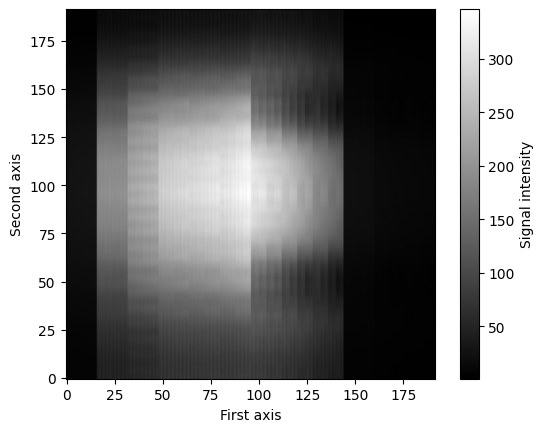

In [11]:
plt.imshow(recovered_img[119,:,:].T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()

In [47]:
calc_PSNR(img_data, recovered_img)

np.float64(33.44259608604962)

In [49]:
compute_ssim_2D(img_data, recovered_img)

np.float64(0.8632740077679137)

In [50]:
avg_SSIM_3D(img_data, recovered_img)

np.float64(0.6552211272066283)

In [42]:
from src.evaluation.benchmark import *

In [45]:
DPath = "Data/MRI Dataset"
files = find_specific_files(DPath, ".gz")[0,1]

TypeError: list indices must be integers or slices, not tuple